In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/eda/Dataset (2).xlsx")

In [ ]:
df.head()

,observation_date,GOLDAMGBD228NLBM
0,1968-04-01,38.0
1,1968-04-02,37.6
2,1968-04-03,37.7
3,1968-04-04,36.7
4,1968-04-05,37.2


In [ ]:
df.shape

(13908, 2)

In [ ]:
df.columns

Index(['observation_date', 'GOLDAMGBD228NLBM'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  13908 non-null  datetime64[ns]
 1   GOLDAMGBD228NLBM  13477 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 217.4 KB


In [ ]:
df.isnull().sum()

observation_date      0
GOLDAMGBD228NLBM    431
dtype: int64

In [ ]:
df["GOLDAMGBD228NLBM"].fillna( method ='backfill', inplace = True)


In [ ]:
df.isnull().sum()

observation_date    0
GOLDAMGBD228NLBM    0
dtype: int64

In [ ]:
df.shape

(13908, 2)

In [ ]:
df.describe()

,GOLDAMGBD228NLBM
count,13908.000000
mean,573.322234
std,485.393571
min,34.775000
25%,281.700000
50%,383.475000
75%,827.750000
max,2061.500000


Univariate → “one variable” data visualization

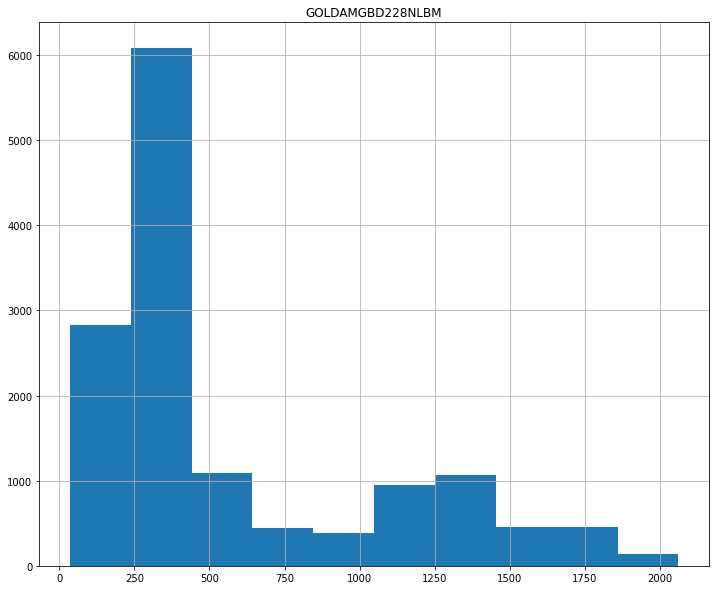

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10));

In [ ]:
df.plot(figsize=(20,8))
plt.title("Gold price (Monthly) since 1968")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd95580ef80> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
round(df.describe(),3)

,GOLDAMGBD228NLBM
count,13908.000
mean,573.322
std,485.394
min,34.775
25%,281.700
50%,383.475
75%,827.750
max,2061.500


Inference

1.The Average gold price in last 70 years is 572.786

2.Only 25% of the time, the gold price is above 823.250

3.Highest Gold price ever touched is 2061.500

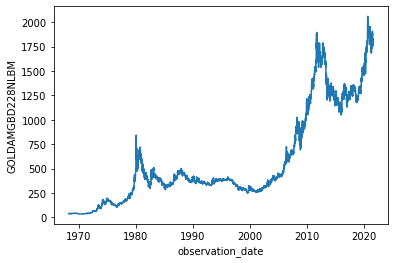

In [ ]:
sns.lineplot(data=df, x="observation_date", y="GOLDAMGBD228NLBM")

*so lets make another 2 columns which contains year and month*
1.Then we can easily do some analysis on this data set.


In [ ]:
df["year"]=pd.DatetimeIndex(df["observation_date"]).year

In [ ]:
df["month"]=pd.DatetimeIndex(df["observation_date"]).month


In [ ]:
df.head()

,observation_date,GOLDAMGBD228NLBM,year,month
0,1968-04-01,38.0,1968,4
1,1968-04-02,37.6,1968,4
2,1968-04-03,37.7,1968,4
3,1968-04-04,36.7,1968,4
4,1968-04-05,37.2,1968,4


01.  On which year the Gold price was highest

In [ ]:
df.loc[df["GOLDAMGBD228NLBM"]==df["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
13659,2020-08-07,2061.5,2020,8


i) On which year the Gold price was lowest

In [ ]:
df.loc[df["GOLDAMGBD228NLBM"]==df["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
469,1970-01-16,34.775,1970,1
470,1970-01-19,34.775,1970,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


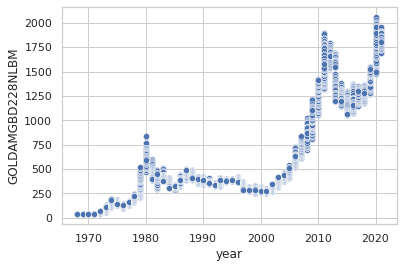

In [ ]:
x=df.year
y=df.GOLDAMGBD228NLBM

 
sns.set(style='whitegrid')

sns.scatterplot(x,y)
plt.show()

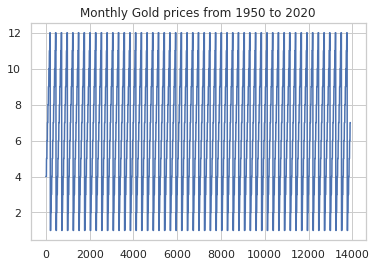

In [ ]:
df['month'].plot(kind = 'line', title = "Monthly Gold prices from 1950 to 2020")

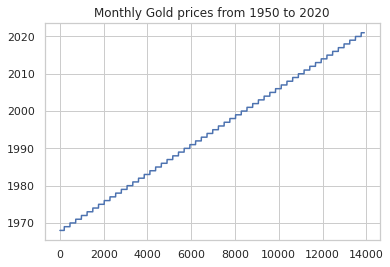

In [ ]:
df['year'].plot(kind = 'line', title = "Monthly Gold prices from 1950 to 2020")

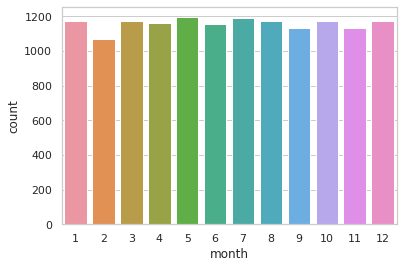

In [ ]:
sns.countplot(x="month",data=df)

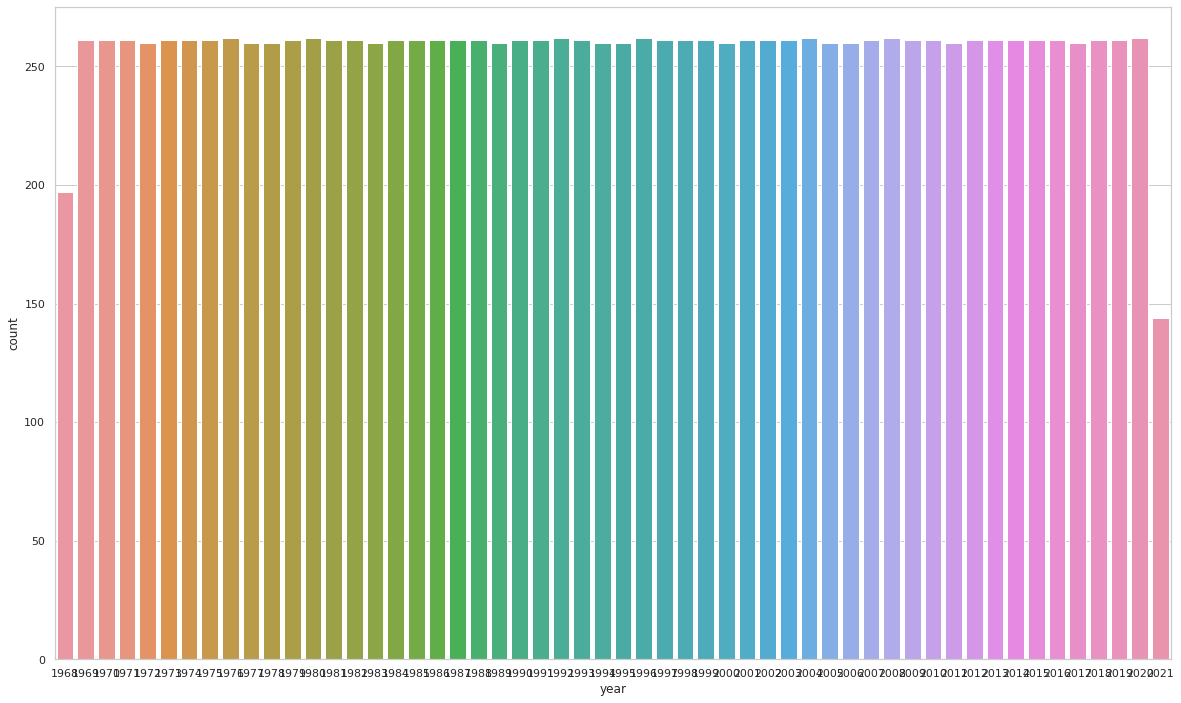

In [ ]:

plt.figure(figsize=(20,12))
sns.countplot(x="year",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


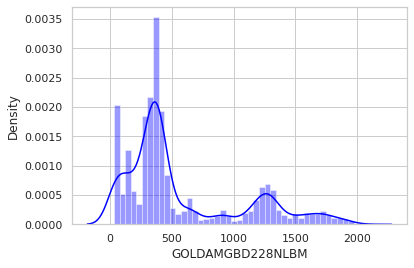

In [ ]:
sns.distplot(df['GOLDAMGBD228NLBM'], color = 'blue')

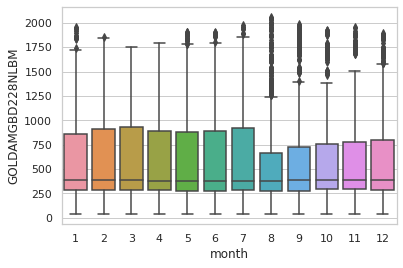

In [ ]:
sns.boxplot(x="month",y="GOLDAMGBD228NLBM",data=df)

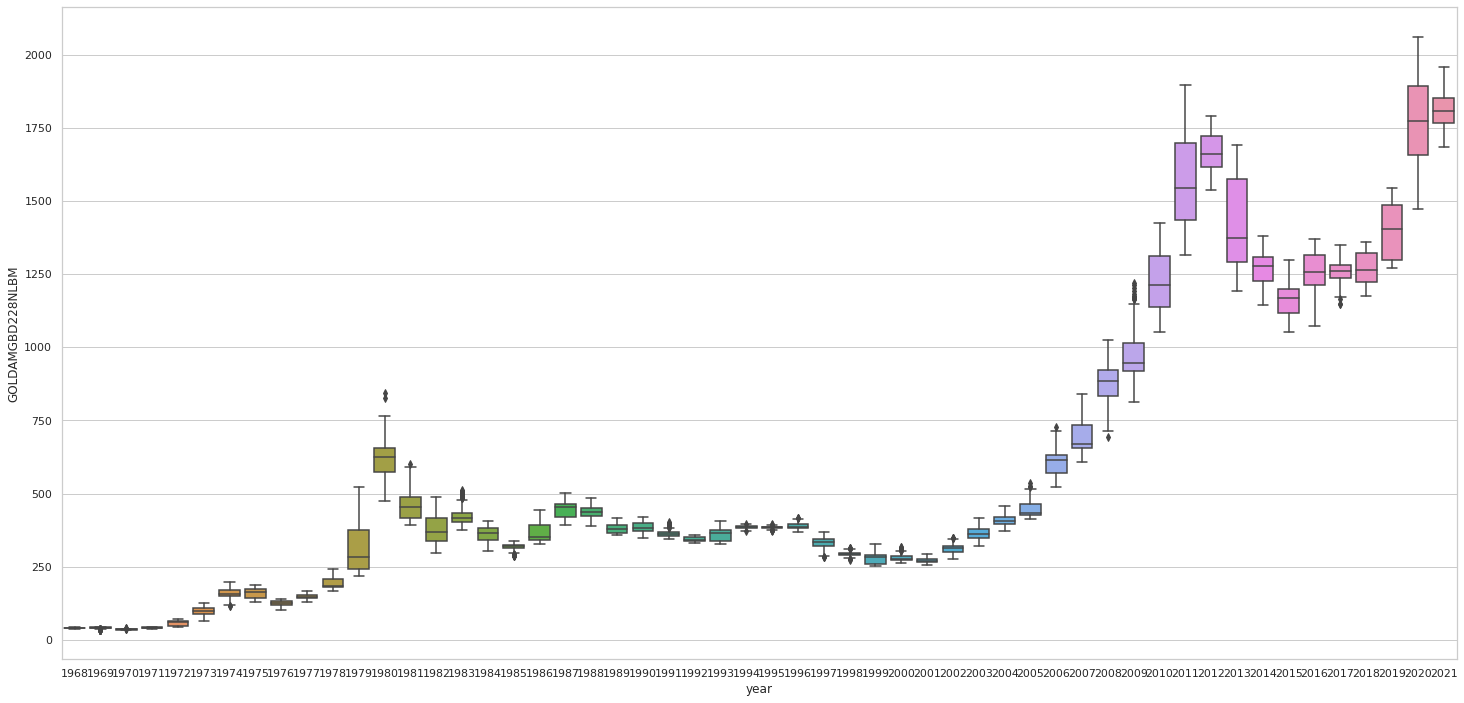

In [ ]:

plt.figure(figsize=(25,12))
sns.boxplot(x="year",y="GOLDAMGBD228NLBM",data=df)


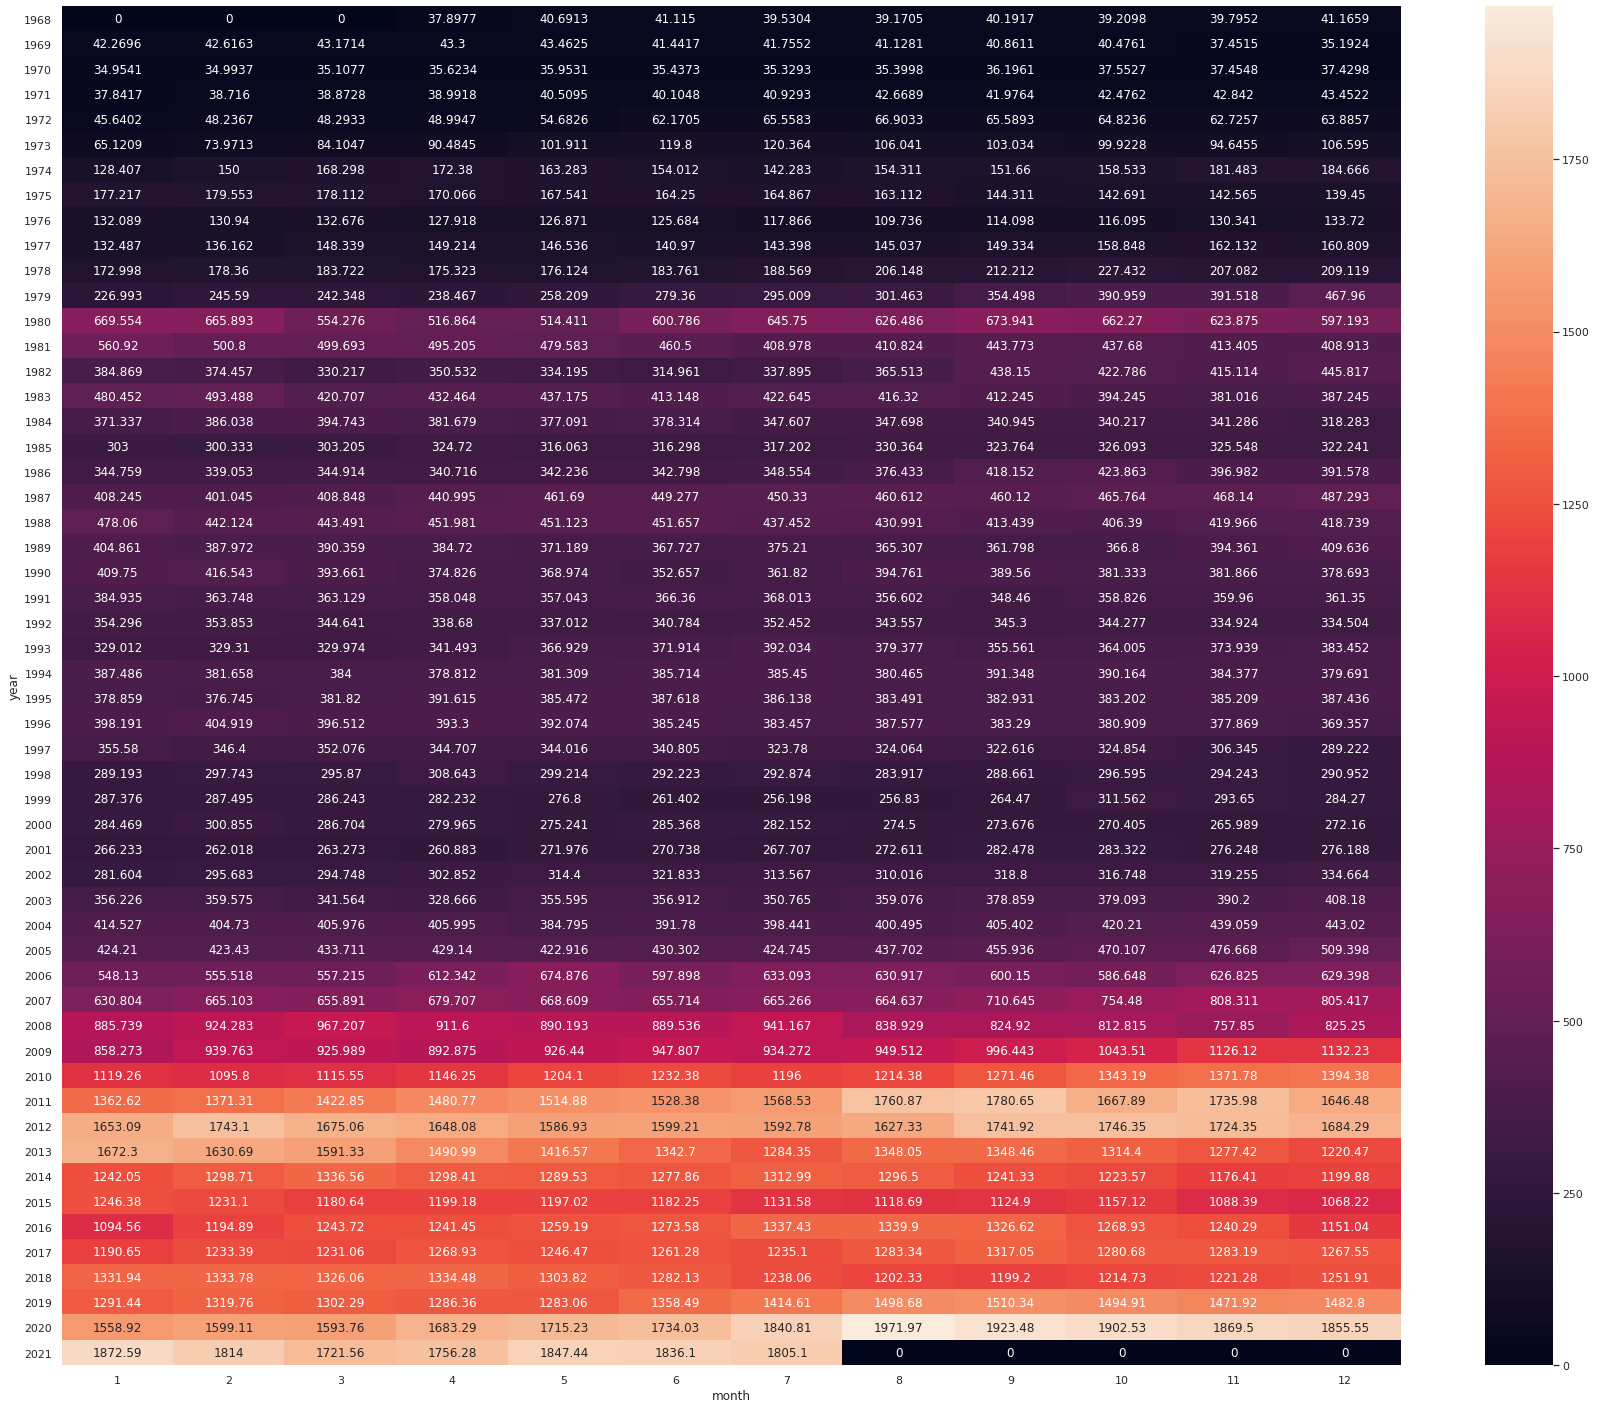

In [ ]:
plt.figure(figsize=(30,25))
heatmap_y_month = pd.pivot_table(data=df,values="GOLDAMGBD228NLBM",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

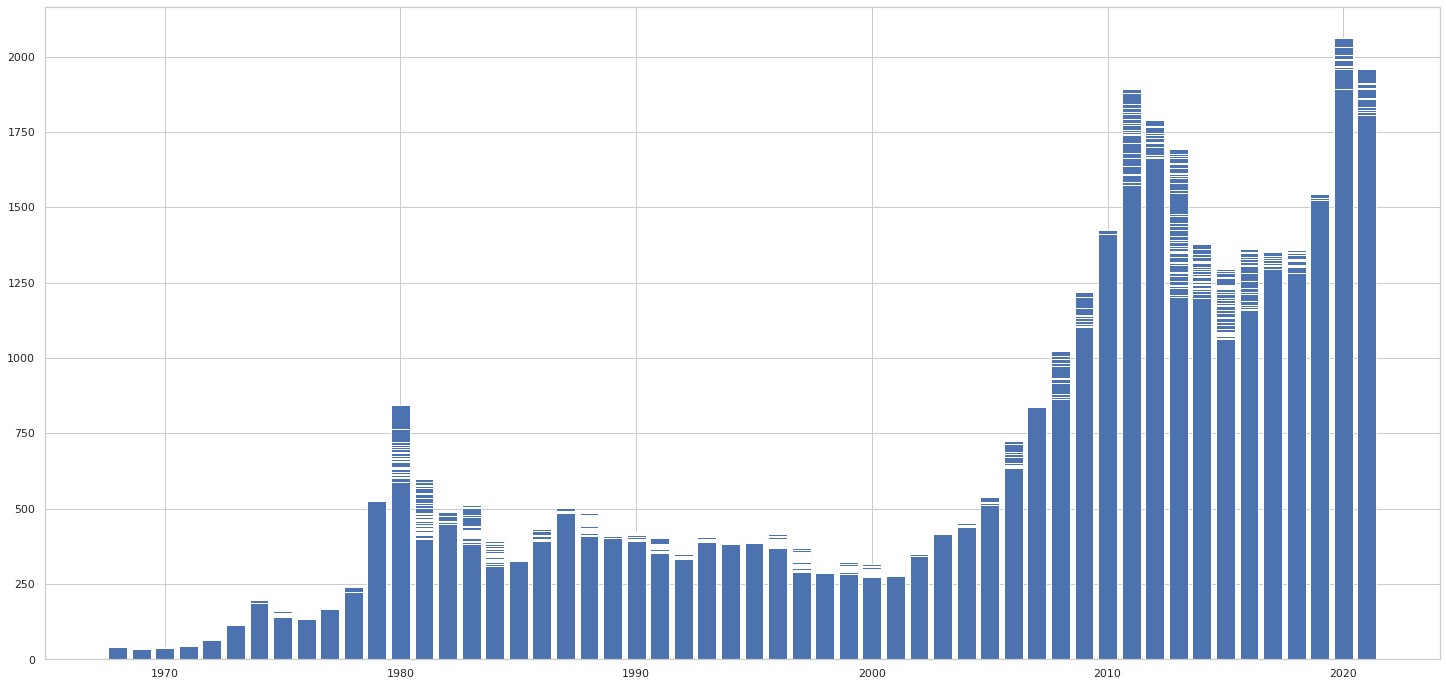

In [ ]:
plt.figure(figsize=(25,12))

plt.bar(x,y)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping

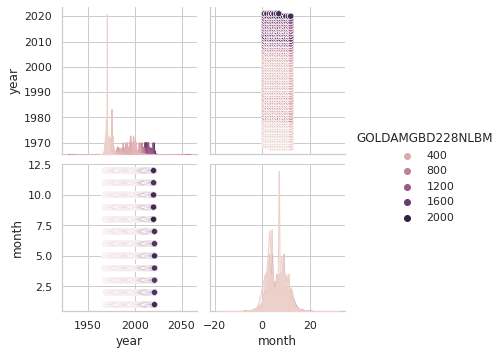

In [ ]:
sns.pairplot(df, hue="GOLDAMGBD228NLBM")

Text(0.5, 1.0, 'Gold')

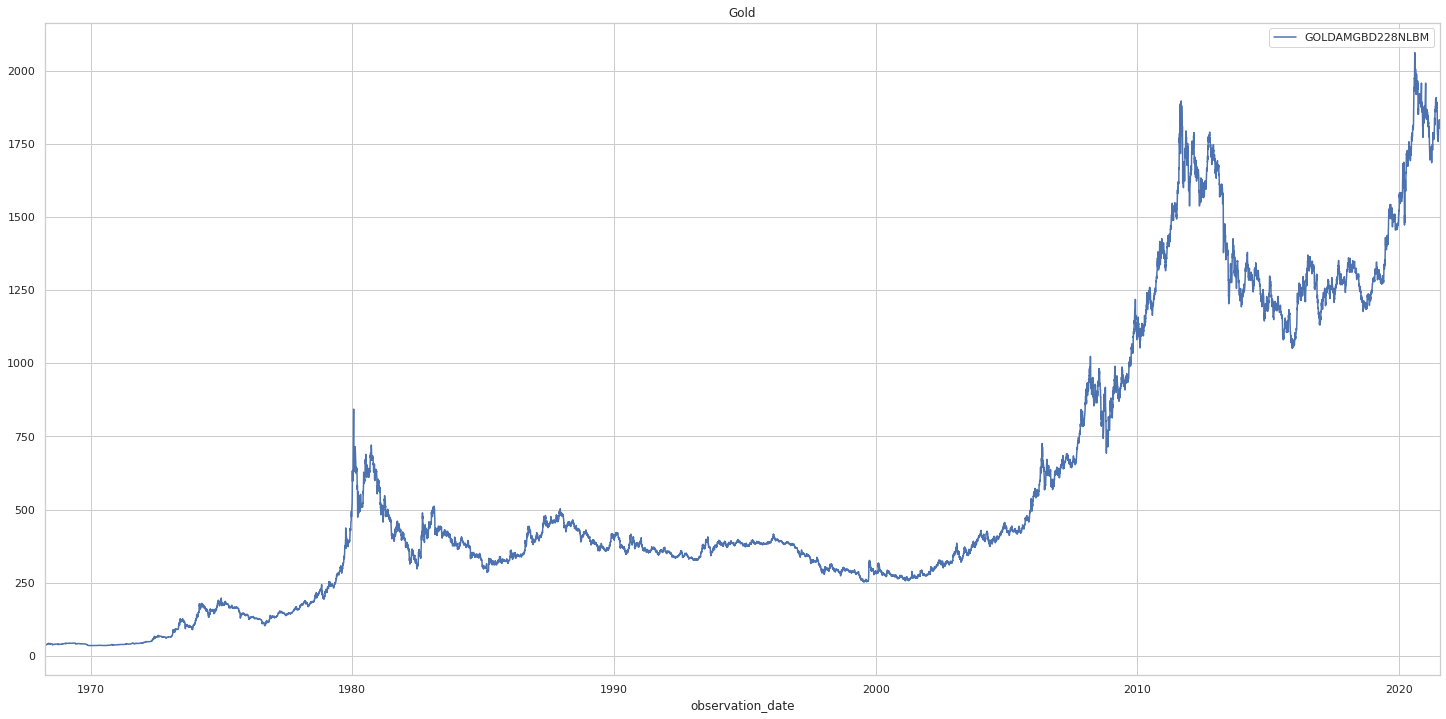

In [ ]:
from matplotlib.pyplot import figure

commodity_type = "Gold"

plt.rcParams["figure.figsize"] = (25,12)
df.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

In [ ]:
# Set up the function of selecting range of date and commodity type
def extract_data(start_date,end_date,commodity_type):
  if commodity_type == "Gold":
    return df[(df.observation_date>=start_date)&(df.observation_date<=end_date)]

In [ ]:
# In this case, I select the data from 1968-01-01 to 1977-12-30 and gold as my input
start_date = "1968-01-01"
end_date = "1977-12-30"
commodity_type = "Gold"
df1= extract_data(start_date, end_date, commodity_type);

In [ ]:
df1.loc[df["GOLDAMGBD228NLBM"]==df1["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
1760,1974-12-30,197.5,1974,12


In [ ]:
df1.loc[df["GOLDAMGBD228NLBM"]==df1["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
469,1970-01-16,34.775,1970,1
470,1970-01-19,34.775,1970,1


Text(0.5, 1.0, 'Gold')

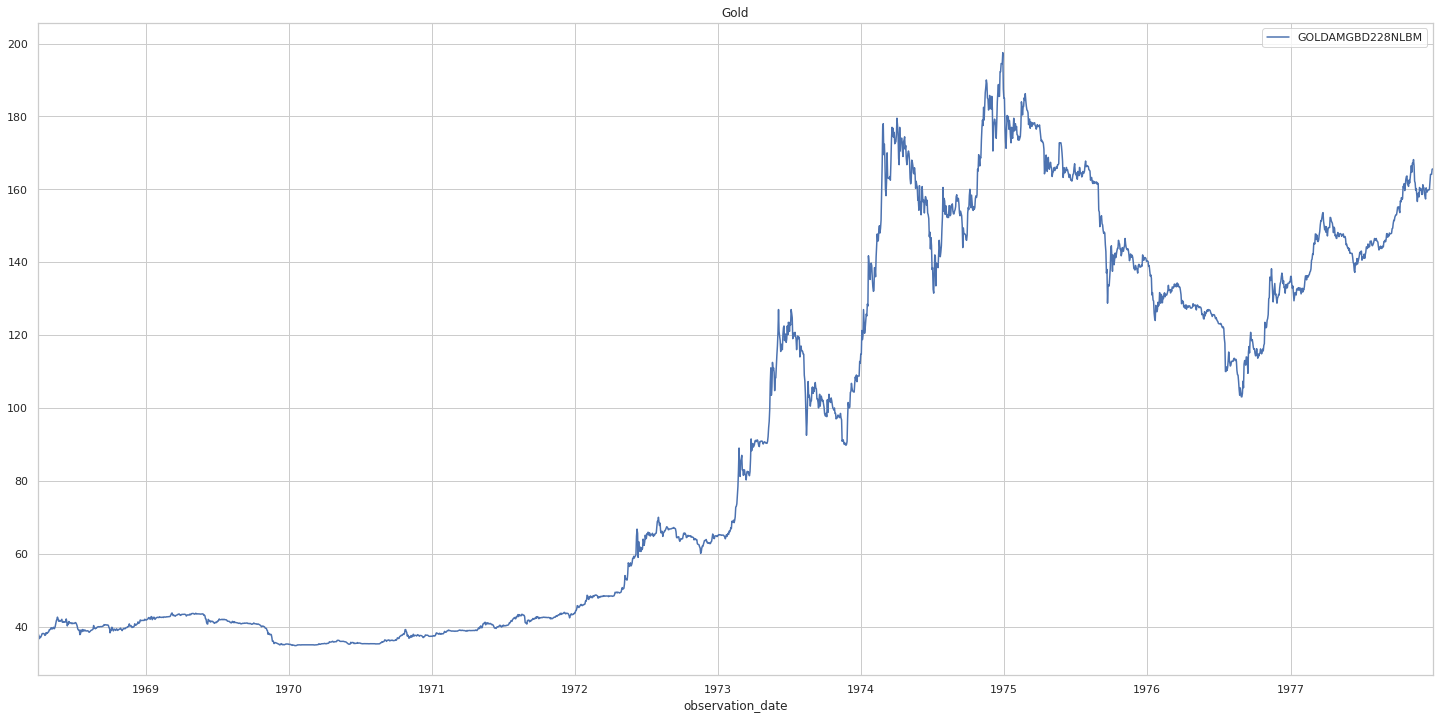

In [ ]:
df1.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

In 1973, for the first time gold broke the USD 100 barreir

In [ ]:
# In this case, I select the data from 1978-01-01 to 1987-12-30 and gold as my input
start_date = "1978-01-01"
end_date = "1987-12-30"
commodity_type = "Gold"
df2= extract_data(start_date, end_date, commodity_type);

In [ ]:
df2.loc[df["GOLDAMGBD228NLBM"]==df2["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
3080,1980-01-21,843.0,1980,1


In [ ]:
df2.loc[df["GOLDAMGBD228NLBM"]==df2["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
2548,1978-01-05,166.3,1978,1


Text(0.5, 1.0, 'Gold')

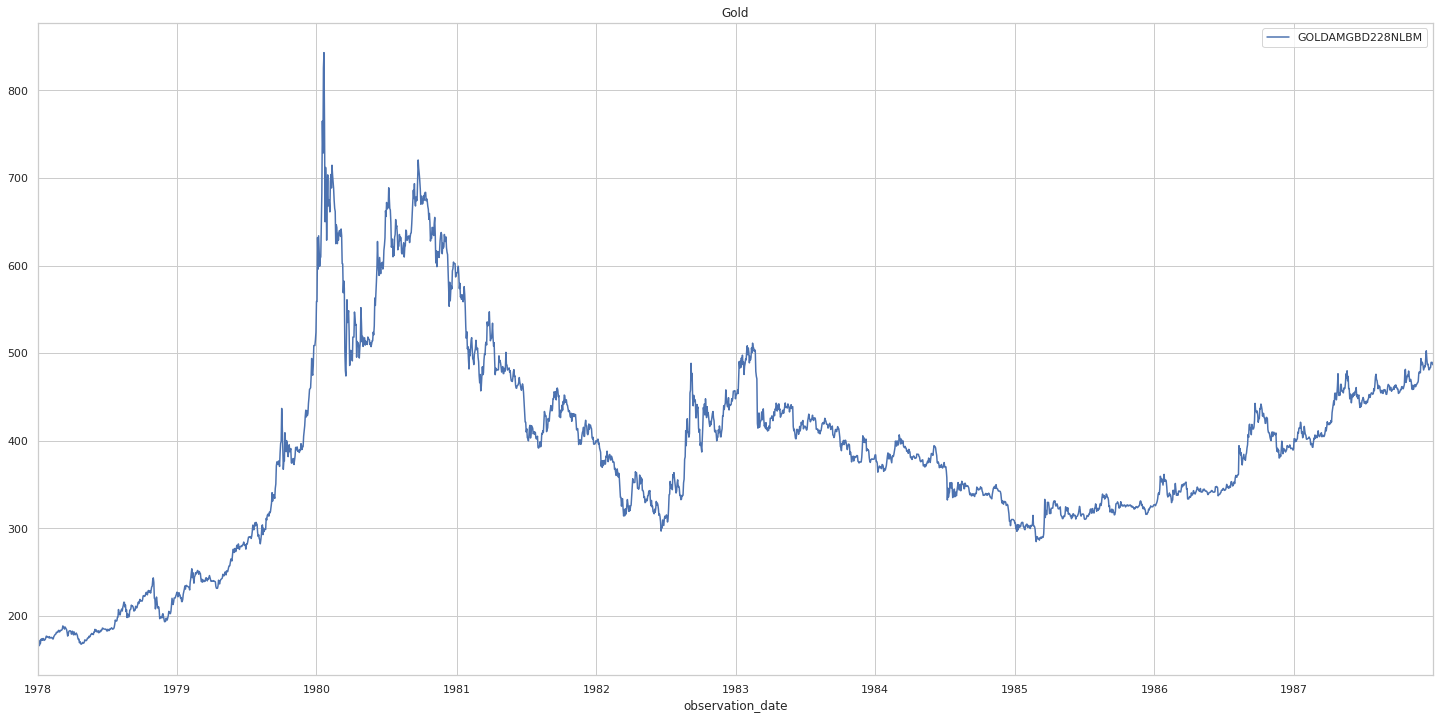

In [ ]:
df2.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

January 1980 – Gold hits a record high of $850 an ounce,

Bretton woods system was dissolved by US President Nixon

as investors pile into bullion prompted by high inflation due to strong oil prices, the Soviet intervention in Afghanistan and the impact of the Iranian revolution.


In [ ]:
# In this case, I select the data from 1988-01-01 to 1997-12-30 and gold as my input
start_date = "1988-01-01"
end_date = "1997-12-30"
commodity_type = "Gold"
df3= extract_data(start_date, end_date, commodity_type);

In [ ]:
df3.loc[df["GOLDAMGBD228NLBM"]==df3["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
5160,1988-01-11,485.3,1988,1


In [ ]:
df3.loc[df["GOLDAMGBD228NLBM"]==df3["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
7749,1997-12-12,283.05,1997,12


Text(0.5, 1.0, 'Gold')

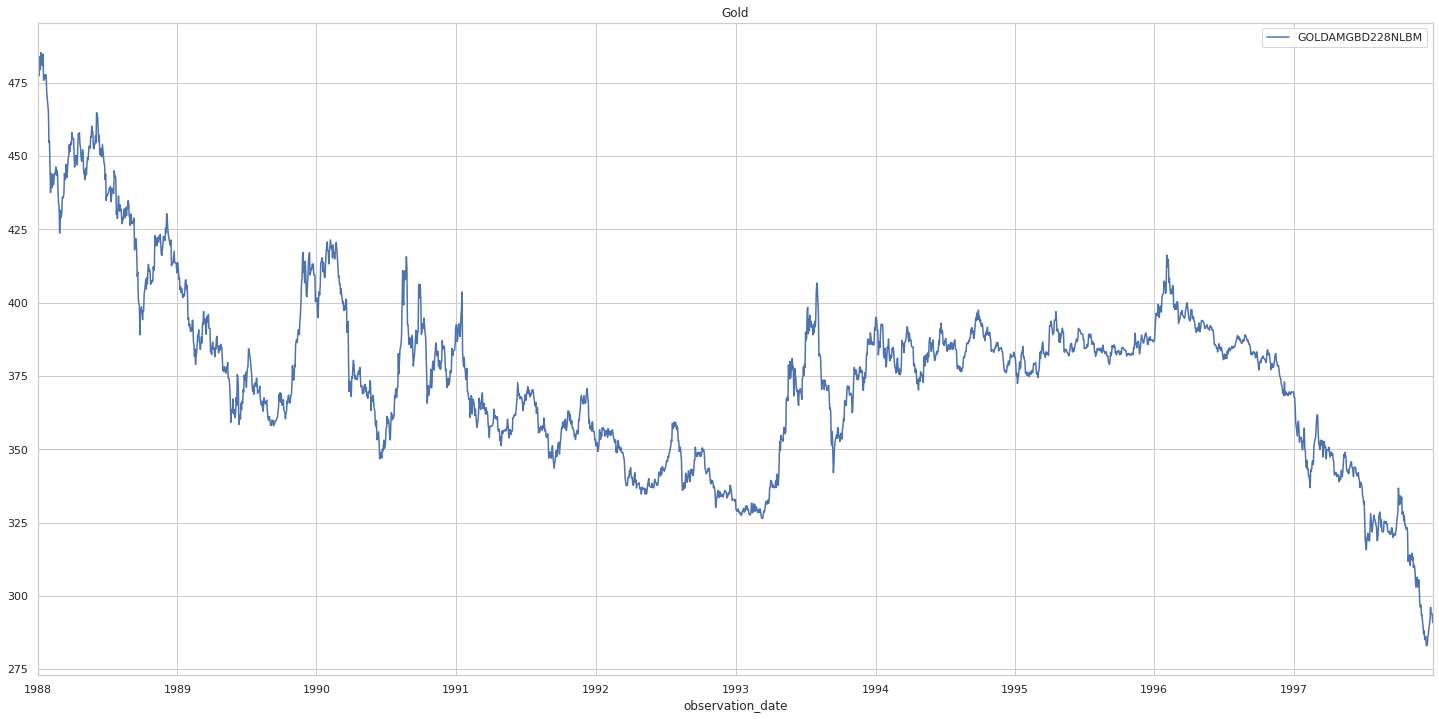

In [ ]:
df3.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

Correction Period It was more like a one way down south for gold, after experiencing the record price in January of 1980. By January 1990, gold was trading around USD 400 per ounce

In [ ]:
# In this case, I select the data from 1998-01-01 to 2007-12-30 and gold as my input
start_date = "1998-01-01"
end_date = "2007-12-30"
commodity_type = "Gold"
df4= extract_data(start_date, end_date, commodity_type);

In [ ]:
df4.loc[df["GOLDAMGBD228NLBM"]==df4["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
10332,2007-11-07,841.75,2007,11


In [ ]:
df4.loc[df["GOLDAMGBD228NLBM"]==df4["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
8167,1999-07-21,252.9,1999,7


Text(0.5, 1.0, 'Gold')

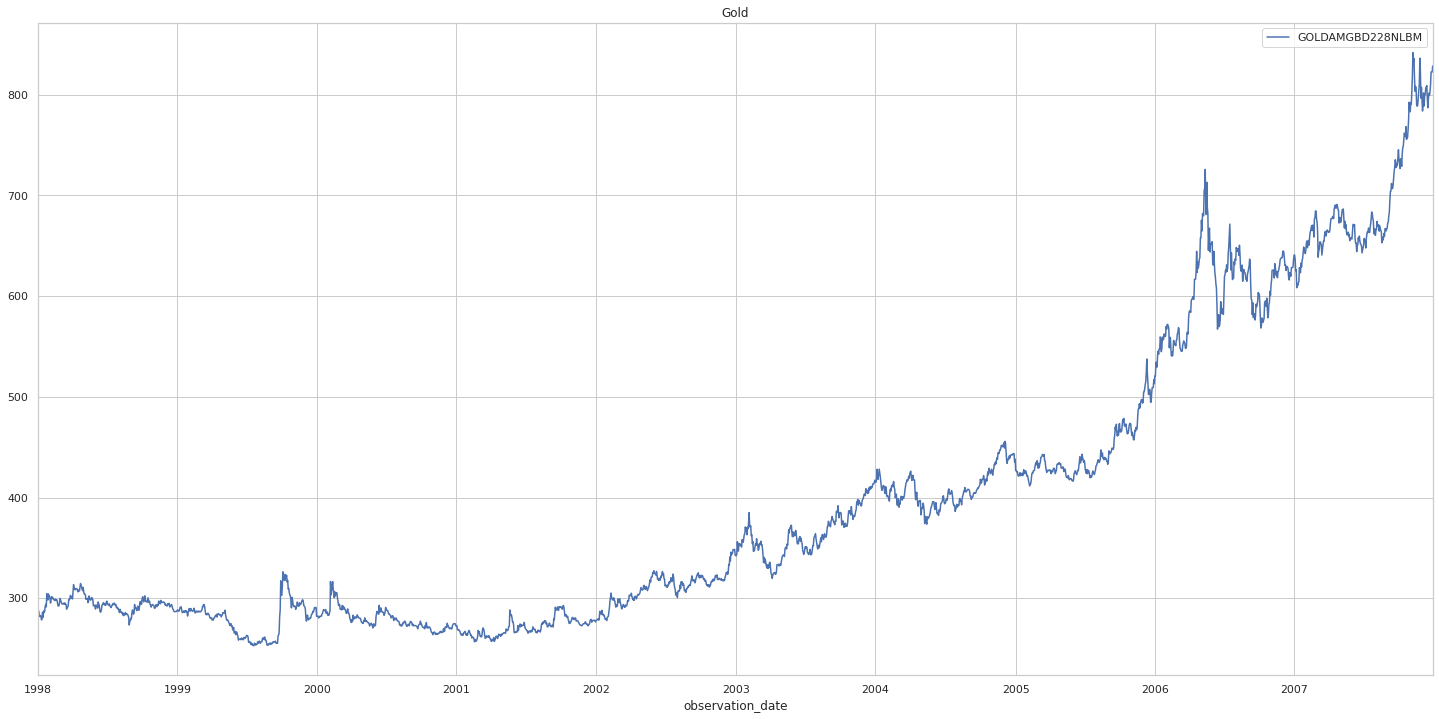

In [ ]:
df4.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

Gold prices have experience new highs post 2001. 
Trading at around USD 250 per ounce, The start of recession times around the year of 2007 sparked substantial spikes in gold prices $841.
. Lack of supply, demand from India and China had a role to play in this rally. India and China are the largest importers of the gold. 
Starting 2001, the gold prodcution fell and demand from these countries was on a rise. It was still a steady growth for gold till the start of recession times. The start of recession times around the year of 2007 sparked substantial spikes in gold prices

In [ ]:
# In this case, I select the data from 2008-01-01 to 2021-7-30 and gold as my input
start_date = "2008-01-01"
end_date = "2021-7-30"
commodity_type = "Gold"
df5= extract_data(start_date, end_date, commodity_type);

In [ ]:
df5.loc[df["GOLDAMGBD228NLBM"]==df5["GOLDAMGBD228NLBM"].max()]

,observation_date,GOLDAMGBD228NLBM,year,month
13659,2020-08-07,2061.5,2020,8


In [ ]:
df5.loc[df["GOLDAMGBD228NLBM"]==df5["GOLDAMGBD228NLBM"].min()]

,observation_date,GOLDAMGBD228NLBM,year,month
10584,2008-10-24,692.5,2008,10


Text(0.5, 1.0, 'Gold')

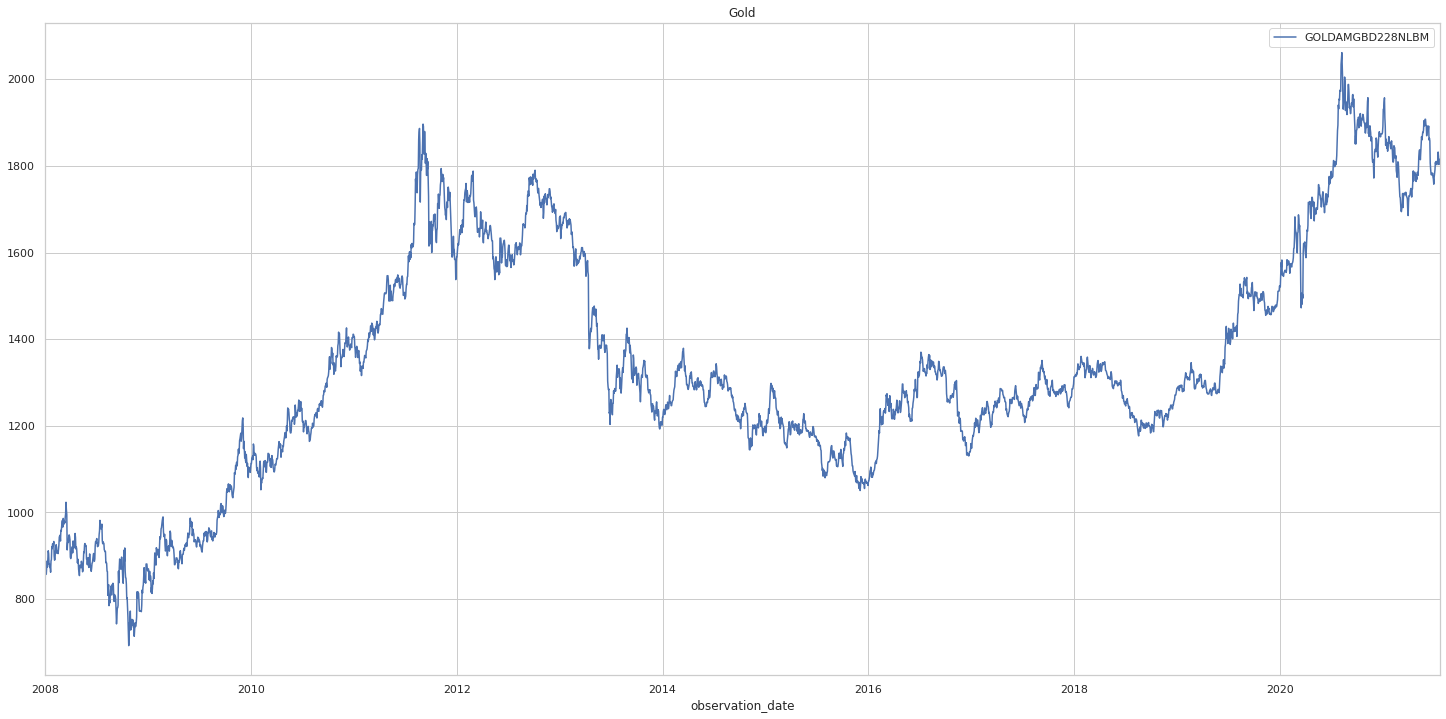

In [ ]:
df5.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title(commodity_type)

The rise to record highs in 2011 was a result of the worst recession since the Great Depression.
the 2020 records were due to the COVID-19 pandemic $2061.

Gold as any other investment do not always guarantee a positive return. It is a safe haven against inflation and economic/political turmoil.

## Stationarity Test

In [ ]:
# only take Price column 
# set date as index to make df series type 
dfs = df.set_index('observation_date')['GOLDAMGBD228NLBM']
type(dfs)

pandas.core.series.Series

In [ ]:
dfs.head()

observation_date
1968-04-01    38.0
1968-04-02    37.6
1968-04-03    37.7
1968-04-04    36.7
1968-04-05    37.2
Name: GOLDAMGBD228NLBM, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller


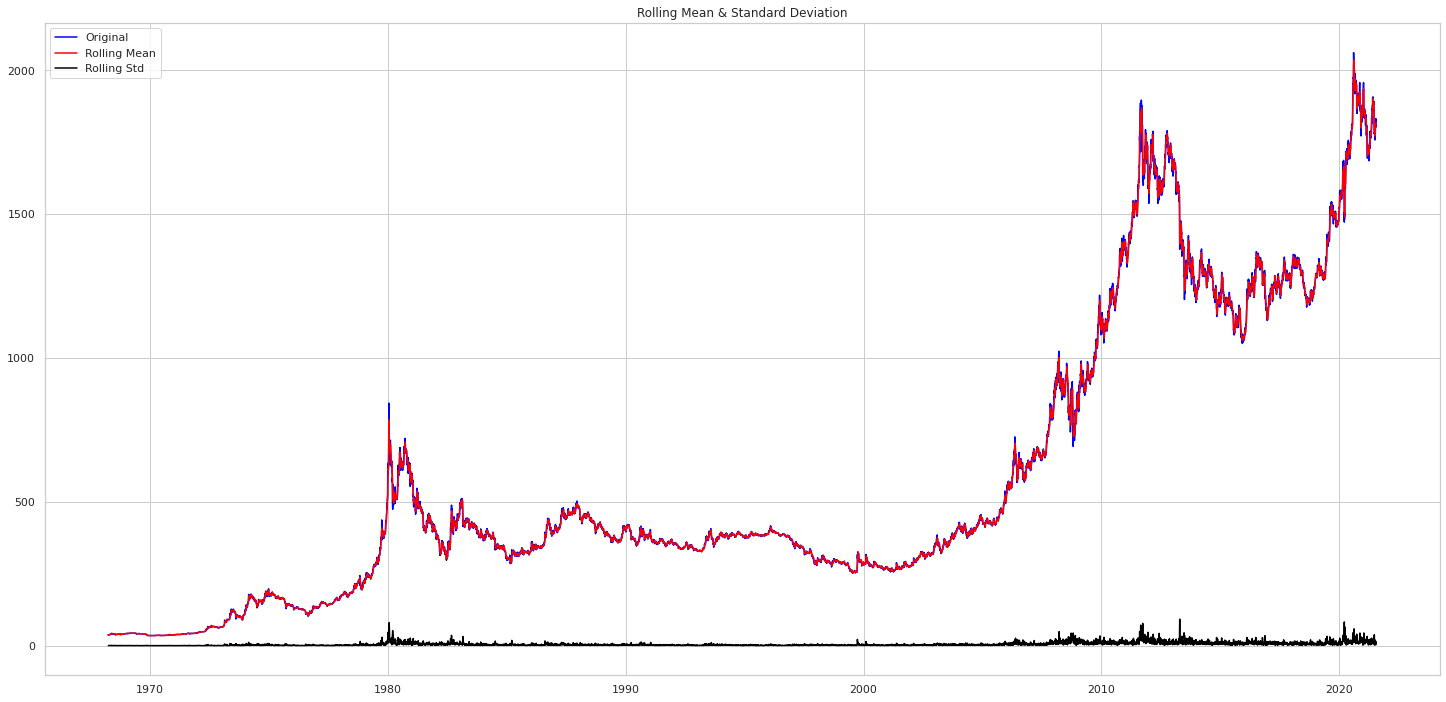

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                     0.596911
p-value                            0.987539
#Lags Used                        41.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() 
    rolstd = timeseries.rolling(window=5).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(80,10))
    plt.show(block=False)
    major_ticks = np.arange(0, 101, 20)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(dfs)

For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value 0.98 (at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

## Data Stationarity Transformation

#### Exponential average

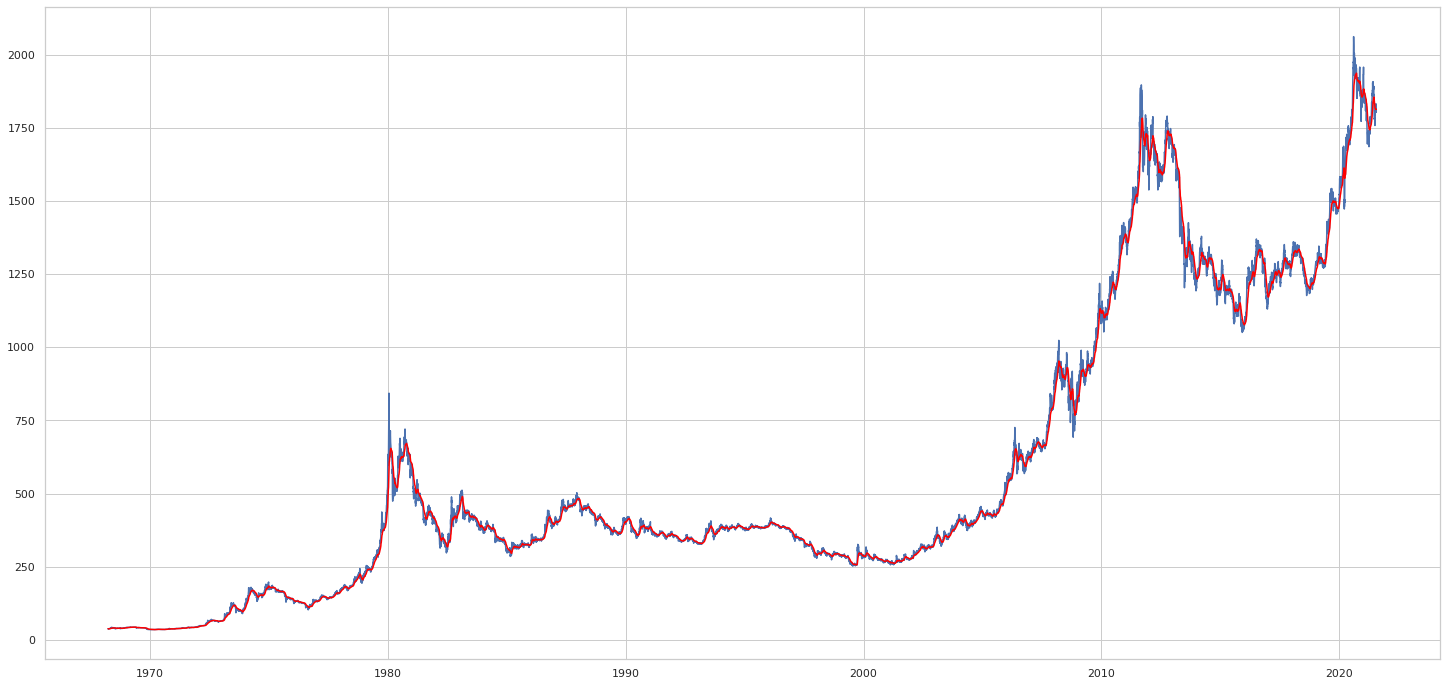

In [ ]:
expwighted_avg = dfs.ewm(halflife=12).mean()
plt.plot(dfs)
plt.plot(expwighted_avg, color='red')

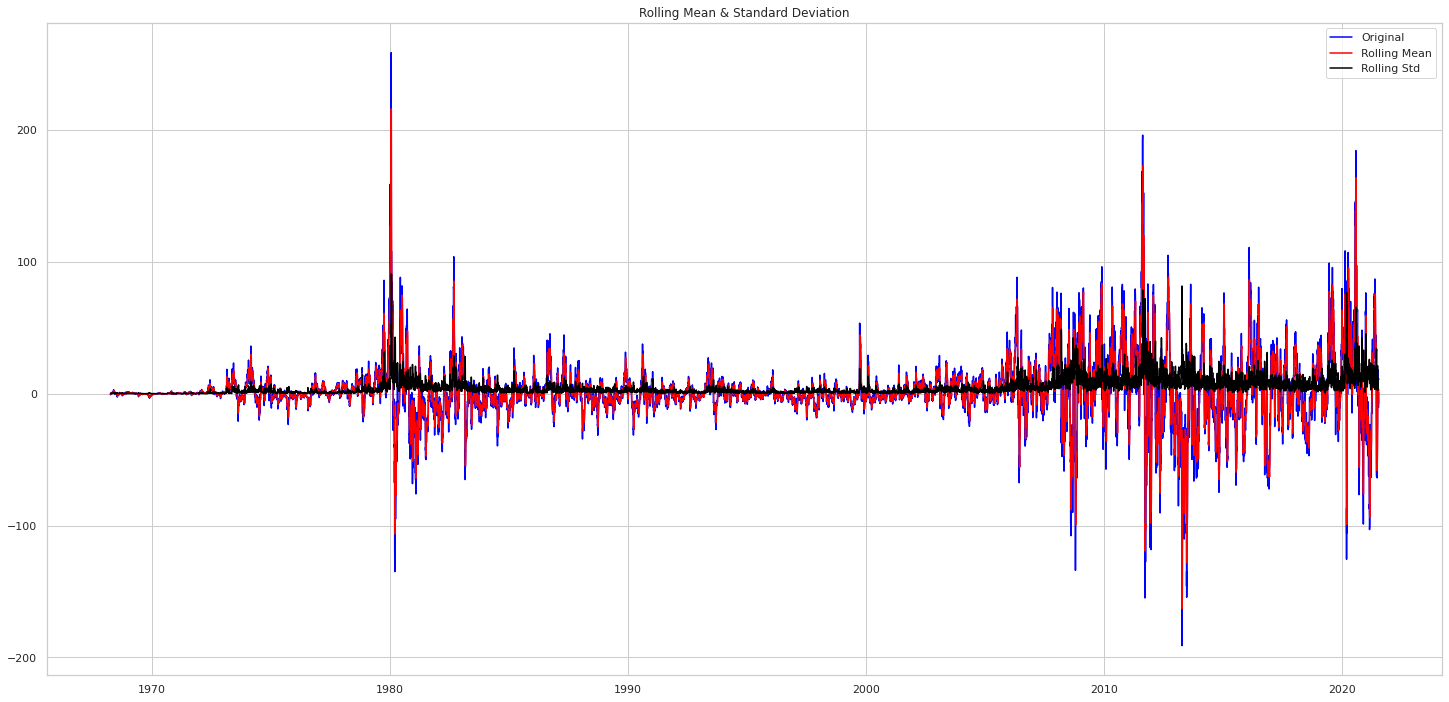

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.412935e+01
p-value                        2.348585e-26
#Lags Used                     4.100000e+01
Number of Observations Used    1.386600e+04
Critical Value (1%)           -3.430822e+00
Critical Value (5%)           -2.861748e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [ ]:
ewma_diff = dfs - expwighted_avg
test_stationarity(ewma_diff)

We can see now p-value is lesser than 5%, meaning this ewma_diff is stationary data.

##### Differencing

In [ ]:
2.34**-26

2.514129866946814e-10

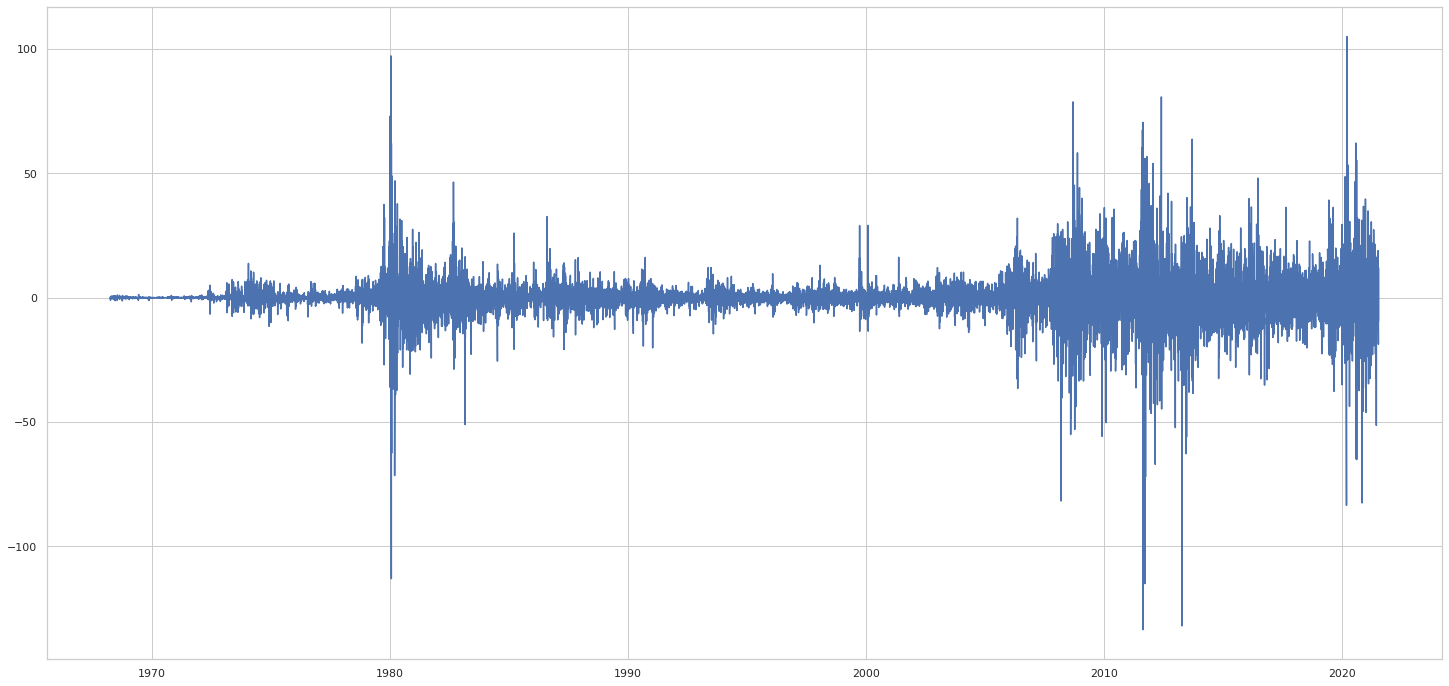

In [ ]:
dfs_diff = dfs - dfs.shift()
plt.plot(dfs_diff)

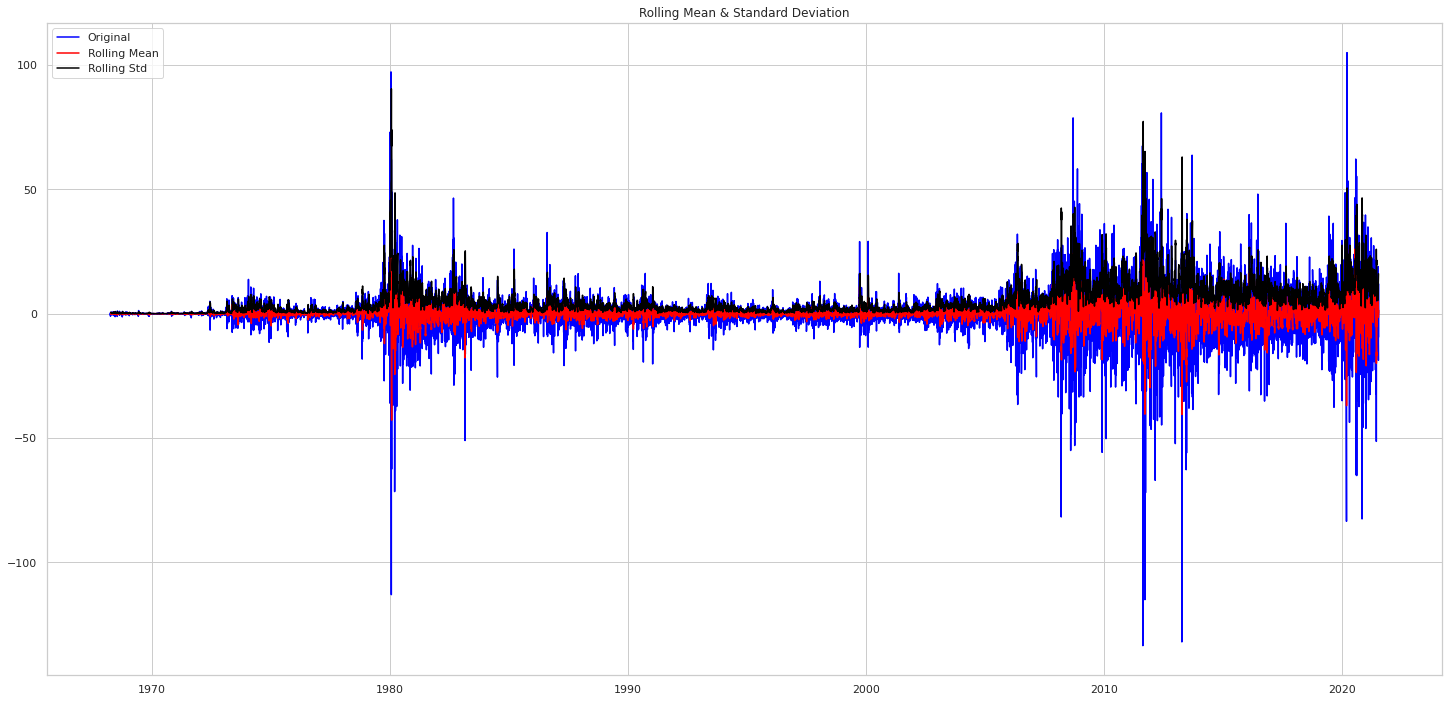

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -19.726149
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [ ]:
dfs_diff.dropna(inplace=True)

test_stationarity(dfs_diff)

we can see p-value is smaller than 5%, meaning this difference of element is showing stationary data

## Decomposing

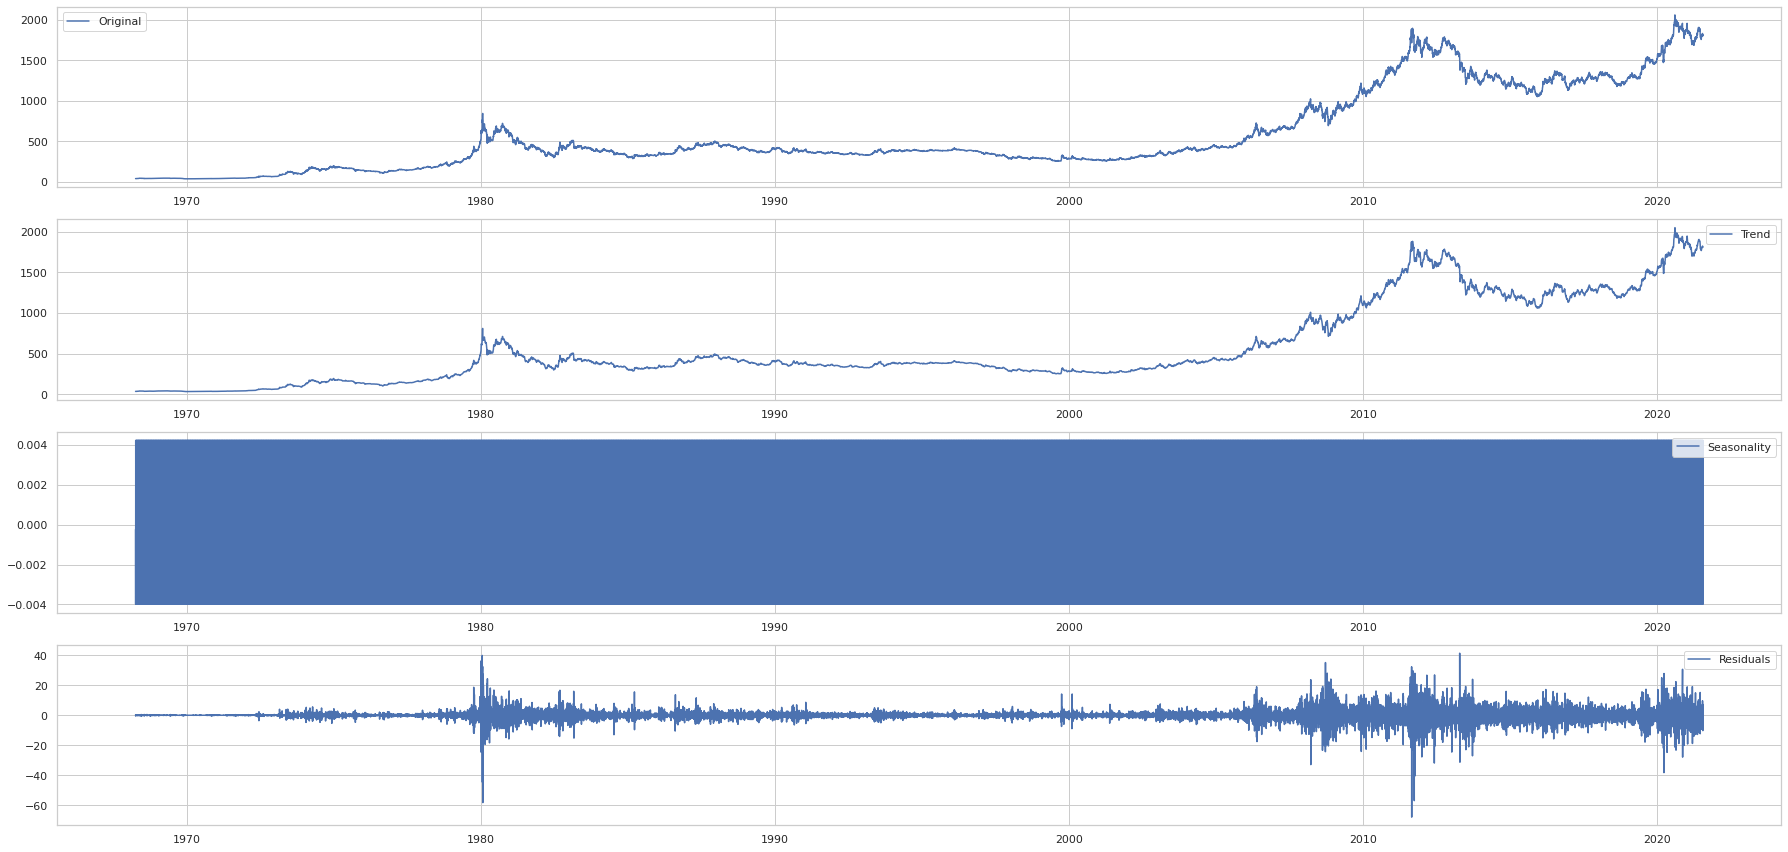

In [ ]:
decomposition = seasonal_decompose(dfs, freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dfs, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

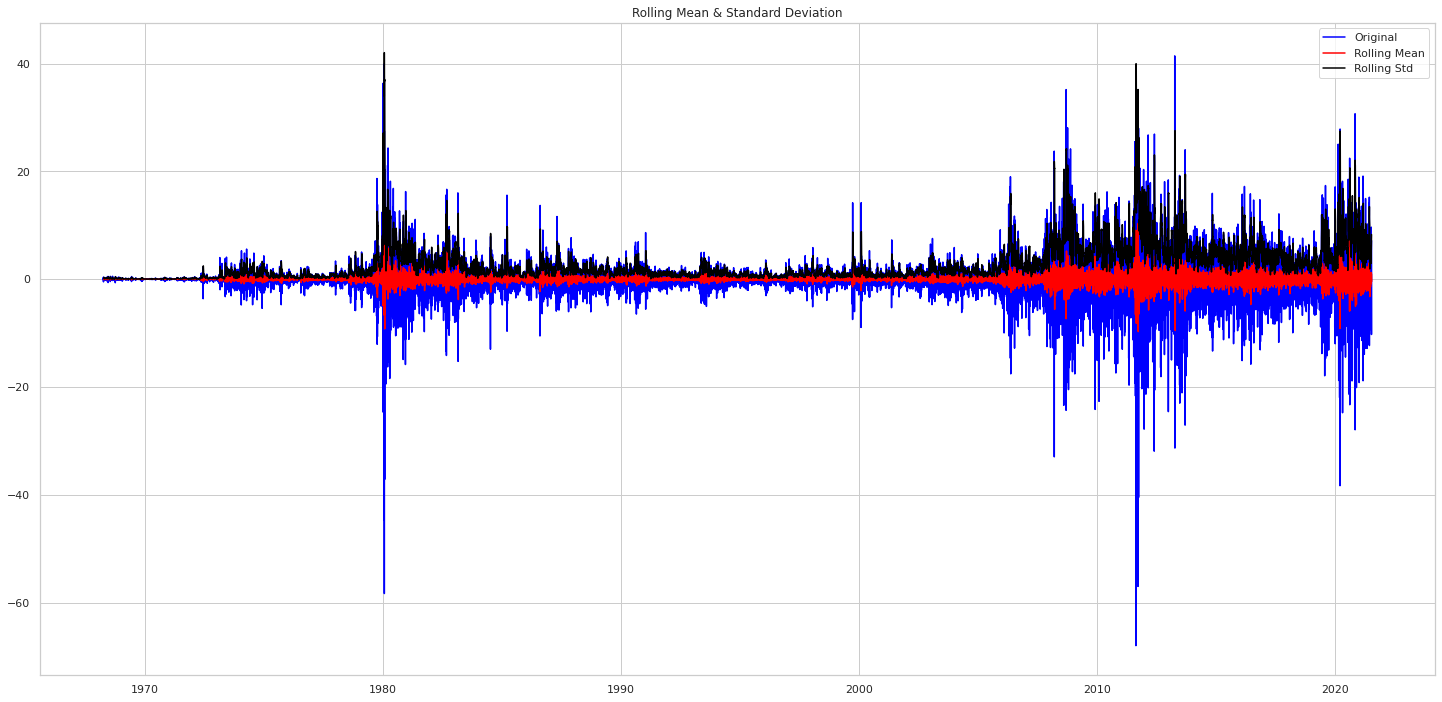

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.955351
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    13863.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861749
Critical Value (10%)              -2.566881
dtype: float64


In [ ]:
dfs_decompose = residual
dfs_decompose.dropna(inplace=True)
test_stationarity(dfs_decompose)

From above plot, we can see that by doing this seasonal decomposing, the price data is broken into trend, seasonality, and residuals. From the scale of each subplot, price has very small seasonality, which makes sense, since unlike other commodities that might have seasonality, gold's mined supply is essentially constant year-round.



p-value is smaller than 5% and showing stationary data

in India, autumn is a popular season for weddings, where gold consumption usually ramps up there, while similarly for China

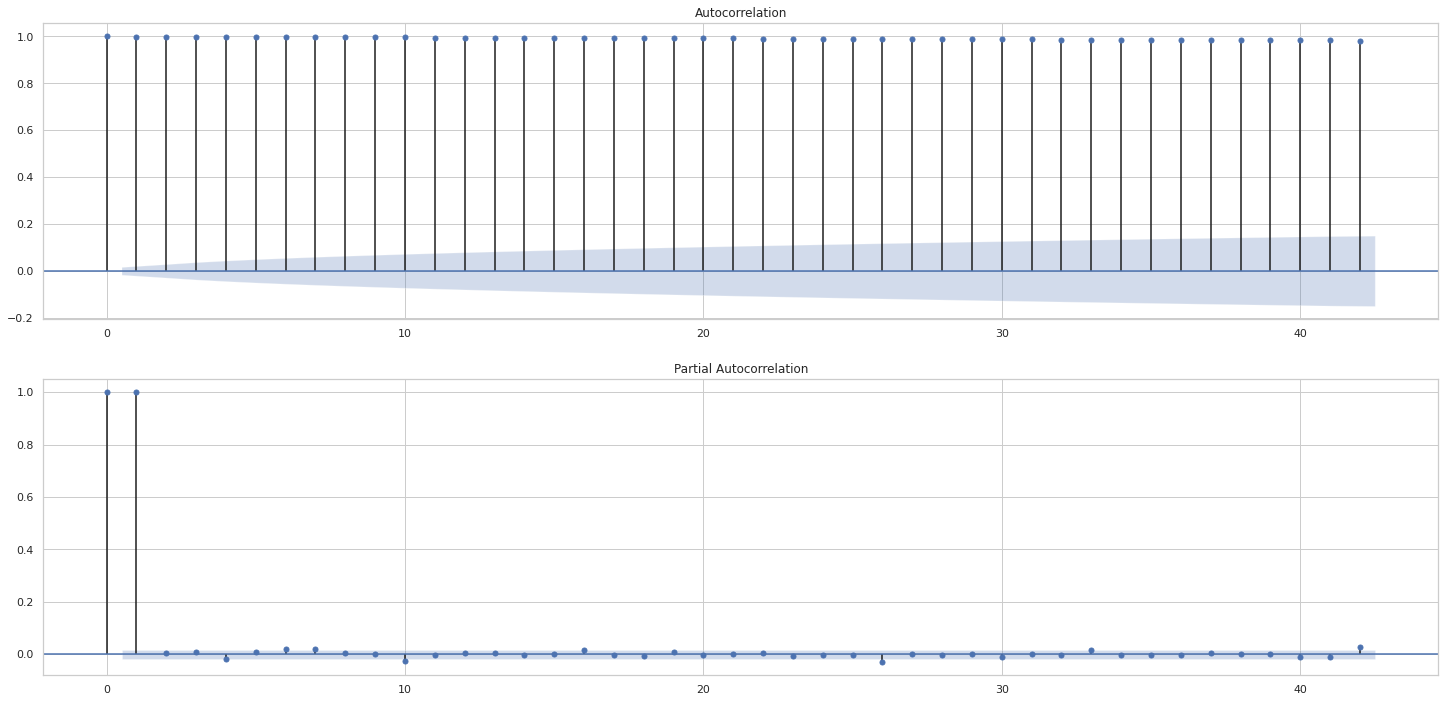

In [ ]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

series = df['GOLDAMGBD228NLBM']
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()


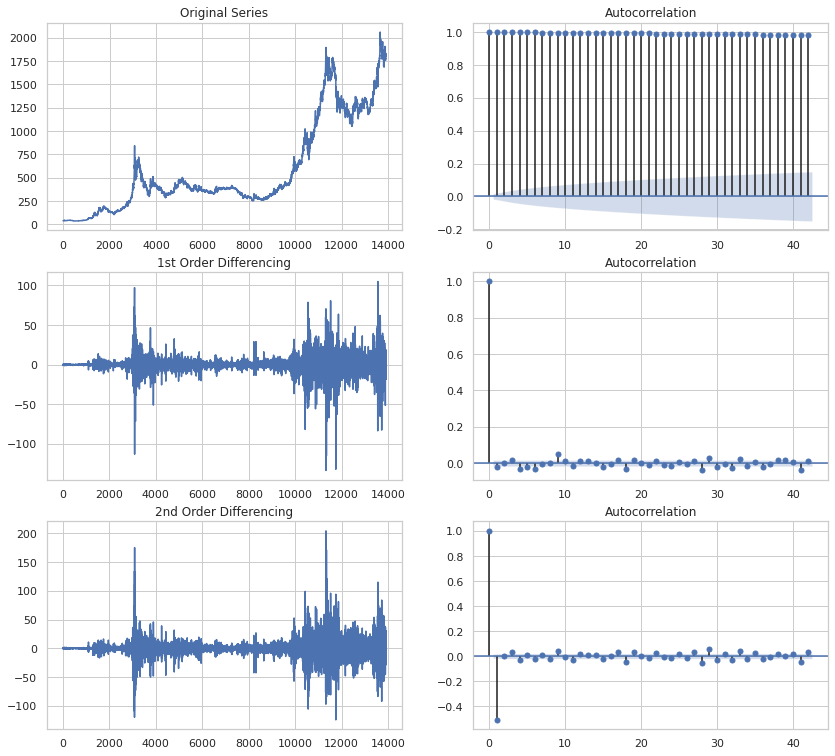

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)

fig.set_size_inches(14,13)

axes[0, 0].plot(df['GOLDAMGBD228NLBM'].values); axes[0, 0].set_title('Original Series')
plot_acf(df['GOLDAMGBD228NLBM'].values, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df['GOLDAMGBD228NLBM'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['GOLDAMGBD228NLBM'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['GOLDAMGBD228NLBM'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['GOLDAMGBD228NLBM'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

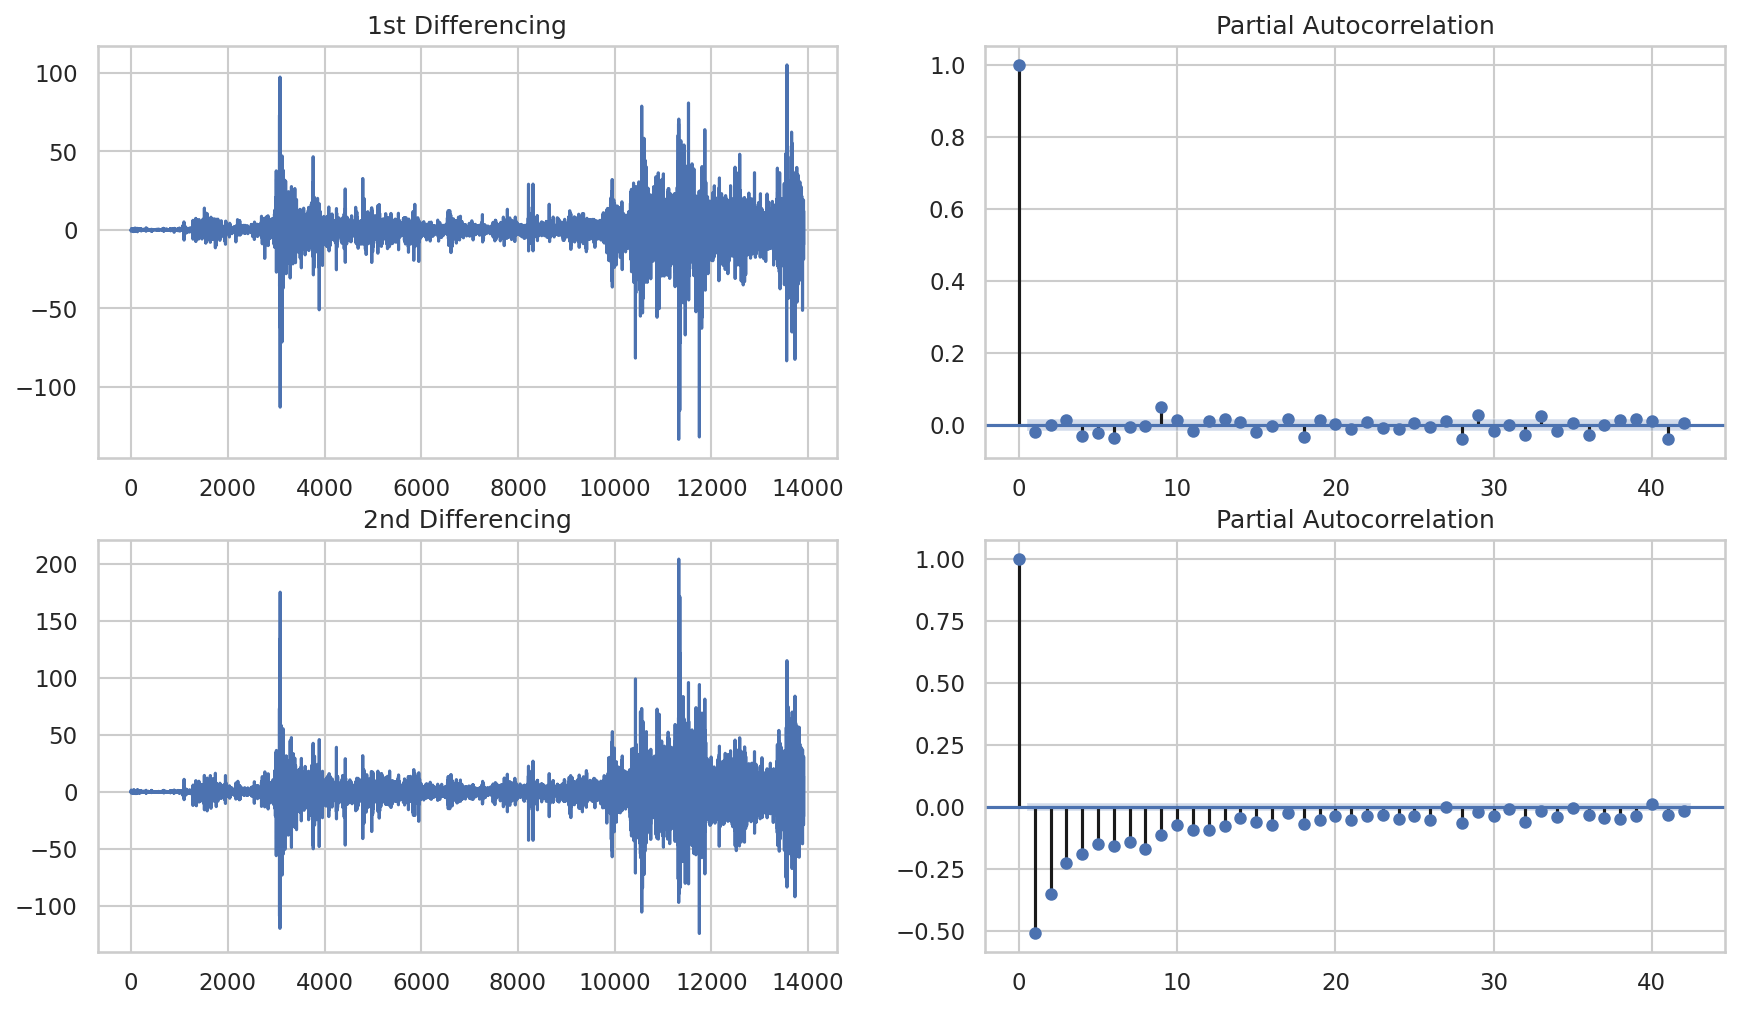

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(14,8), 'figure.dpi':150})

## first order differencing
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df['GOLDAMGBD228NLBM'].diff()); axes[0, 0].set_title('1st Differencing')
plot_pacf(df['GOLDAMGBD228NLBM'].diff().dropna(), ax=axes[0, 1])

## second order differencing
axes[1, 0].plot(df['GOLDAMGBD228NLBM'].diff().diff()); axes[1, 0].set_title('2nd Differencing')
plot_pacf(df['GOLDAMGBD228NLBM'].diff().diff().dropna(), ax=axes[1, 1])

plt.show()

Let’s Split the data into target values and feature values |

In [ ]:
X = df.drop(['observation_date','GOLDAMGBD228NLBM'],axis=1)
Y = df['GOLDAMGBD228NLBM']

Splitting X and Y into training and testing variables : 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model training: Random Forest Regressor : 

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9987471762588731


In [ ]:
! pip install pycaret

     |████████████████████████████████| 264 kB 13.2 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 248 kB 61.4 MB/s 
     |████████████████████████████████| 14.6 MB 84 kB/s 
     |████████████████████████████████| 1.7 MB 67.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 69.2 MB/s 
     |████████████████████████████████| 111 kB 83.1 MB/s 
     |████████████████████████████████| 167 kB 78.5 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 80 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 61.8 MB/s 
     |████████████████████████████████| 2.0 MB 80.1 MB/s 
     |████████████████████████████████| 62 kB 640 kB/s 
     |████████████████████████████████| 675 kB 78.7 MB/s 
     |████████████████████

In [ ]:
import pandas as pd 

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/eda/Dataset (2).xlsx")
data.head()

,observation_date,GOLDAMGBD228NLBM
0,1968-04-01,38.0
1,1968-04-02,37.6
2,1968-04-03,37.7
3,1968-04-04,36.7
4,1968-04-05,37.2


In [ ]:
data.shape

(13908, 2)

In [ ]:
data["GOLDAMGBD228NLBM"].fillna( method ='backfill', inplace = True)


In [ ]:
from pycaret.regression import *

reg = setup(
    data=data, 
    target='GOLDAMGBD228NLBM', 
    train_size=0.7, 
    session_id=10,
    normalize=True, 
    transform_target=True
)

,Description,Value
0,session_id,10
1,Target,GOLDAMGBD228NLBM
2,Original Data,"(13908, 2)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9735, 19)"


In [ ]:
get_config('X')

,observation_date_month_1,observation_date_month_10,observation_date_month_11,observation_date_month_12,observation_date_month_2,observation_date_month_3,observation_date_month_4,observation_date_month_5,observation_date_month_6,observation_date_month_7,observation_date_month_8,observation_date_month_9,observation_date_weekday_0,observation_date_weekday_1,observation_date_weekday_2,observation_date_weekday_3,observation_date_weekday_4,observation_date_is_month_end_1,observation_date_is_month_start_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
best = compare_models(sort='RMSE')
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,345.4425,257471.2044,507.3056,-0.0911,0.9850,1.3467,0.030
lasso,Lasso Regression,345.2641,257472.9453,507.3061,-0.0911,0.9850,1.3466,0.032
en,Elastic Net,345.2641,257472.9453,507.3061,-0.0911,0.9850,1.3466,0.029
br,Bayesian Ridge,345.2746,257481.8151,507.3149,-0.0912,0.9850,1.3467,0.032
ridge,Ridge Regression,346.0495,257938.1516,507.7674,-0.0931,0.9863,1.3500,0.029
lr,Linear Regression,346.0681,257987.0094,507.8159,-0.0933,0.9864,1.3498,0.251
ada,AdaBoost Regressor,345.1443,258601.9248,508.4111,-0.0959,0.9854,1.3398,0.072
gbr,Gradient Boosting Regressor,347.6816,259539.8646,509.3338,-0.0998,0.9905,1.3608,0.258
lightgbm,Light Gradient Boosting Machine,349.0584,260662.4870,510.4346,-0.1046,0.9934,1.3678,0.123
rf,Random Forest Regressor,351.5976,262674.4265,512.3909,-0.1131,0.9988,1.3797,0.678


PowerTransformedTargetRegressor(fit_intercept=True, n_nonzero_coefs=None,
                                normalize=True,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                precompute='auto',
                                regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                                    n_nonzero_coefs=None,
                                                                    normalize=True,
                                                                    precompute='auto',
                                                                    tol=None),
                                tol=None)


In [ ]:
model = create_model('gbr', cross_validation=True, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,340.7059,253100.3934,503.0908,-0.0738,1.0018,1.4218
1,337.8417,245817.3102,495.7997,-0.0920,0.9534,1.2527
2,353.6856,271075.7621,520.6494,-0.1143,0.9912,1.3346
3,351.1660,256749.2193,506.7043,-0.1133,0.9991,1.3798
4,359.0324,273364.9755,522.8432,-0.1159,1.0038,1.3773
5,342.5677,255354.9973,505.3266,-0.0995,0.9656,1.2725
6,360.4970,277445.5260,526.7310,-0.0937,1.0277,1.4760
7,334.2465,242429.2683,492.3711,-0.0894,0.9905,1.3916
8,354.4926,264743.1631,514.5320,-0.1059,1.0134,1.4465
9,342.5802,255318.0310,505.2900,-0.1005,0.9588,1.2555


RMSE: 1257.041


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


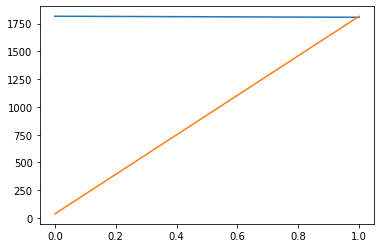

In [ ]:
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('196'+x, '%Y-%m')
series = read_csv('/content/drive/MyDrive/new  gold data.xlsx - FRED Graph.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# split data into train and test
X = series.values
train, test = X[0:2], X[-2:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()